In [47]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import *
from nltk.stem.porter import *
from nltk.metrics import *
nltk.download('stopwords')
nltk.download('punkt')

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\diego\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\diego\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Leer CSV

In [2]:
df_fake = pd.read_csv("Fake.csv")

df_true = pd.read_csv("True.csv")

In [3]:
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
df_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [5]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [6]:
df_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


### Limpieza de texto

In [7]:

stop_words = nltk.corpus.stopwords.words('english')

df_fake['title'] = df_fake['title'].apply(lambda x: ' '.join([word.lower() for word in x.split(' ') if word.lower() not in (stop_words)]))
df_fake['text'] = df_fake['text'].apply(lambda x: ' '.join([word.lower() for word in x.split(' ') if word.lower() not in (stop_words)]))
df_true['title'] = df_true['title'].apply(lambda x: ' '.join([word.lower() for word in x.split(' ') if word.lower() not in (stop_words)]))
df_true['text'] = df_true['text'].apply(lambda x: ' '.join([word.lower() for word in x.split(' ') if word.lower() not in (stop_words)]))

In [8]:
print(stop_words[0:50])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be']


### Verificar texto limpio

In [9]:
df_fake.head()

,title,text,subject,date
0,donald trump sends embarrassing new year’s ev...,donald trump wish americans happy new year lea...,News,"December 31, 2017"
1,drunk bragging trump staffer started russian ...,house intelligence committee chairman devin nu...,News,"December 31, 2017"
2,sheriff david clarke becomes internet joke th...,"friday, revealed former milwaukee sheriff davi...",News,"December 30, 2017"
3,trump obsessed even obama’s name coded websit...,"christmas day, donald trump announced would b...",News,"December 29, 2017"
4,pope francis called donald trump christmas sp...,pope francis used annual christmas day message...,News,"December 25, 2017"


In [10]:
df_true.head()

,title,text,subject,date
0,"u.s. budget fight looms, republicans flip fisc...",washington (reuters) - head conservative repub...,politicsNews,"December 31, 2017"
1,u.s. military accept transgender recruits mond...,washington (reuters) - transgender people allo...,politicsNews,"December 29, 2017"
2,senior u.s. republican senator: 'let mr. muell...,washington (reuters) - special counsel investi...,politicsNews,"December 31, 2017"
3,fbi russia probe helped australian diplomat ti...,washington (reuters) - trump campaign adviser ...,politicsNews,"December 30, 2017"
4,trump wants postal service charge 'much more' ...,seattle/washington (reuters) - president donal...,politicsNews,"December 29, 2017"


In [11]:
df_fake['text'][1]

'house intelligence committee chairman devin nunes going bad day. assumption, like many us, christopher steele-dossier prompted russia investigation lashing department justice fbi order protect trump. happens, dossier started investigation, according documents obtained new york times.former trump campaign adviser george papadopoulos drunk wine bar revealed knowledge russian opposition research hillary clinton.on top that, papadopoulos covfefe boy trump, administration alleged. much larger role, none damning drunken fool wine bar. coffee boys  help arrange new york meeting trump president abdel fattah el-sisi egypt two months election. known former aide set meetings world leaders trump, team trump ran merely coffee boy.in may 2016, papadopoulos revealed australian diplomat alexander downer russian officials shopping around possible dirt then-democratic presidential nominee hillary clinton. exactly much mr. papadopoulos said night kensington wine rooms australian, alexander downer, uncle

In [12]:
fake_title = nltk.Text([word for row in df_fake['title'] for word in row.split(' ')])
fake_text = nltk.Text([word for row in df_fake['text'] for word in row.split(' ')])
true_title = nltk.Text([word for row in df_true['title'] for word in row.split(' ')])
true_text = nltk.Text([word for row in df_true['text'] for word in row.split(' ')])

### Adding labels

In [13]:
title_label = [(title, 'true') for title in df_true['title']] + [(title, 'fake') for title in df_fake['title']]

In [14]:
text_label = [(text, 'true') for text in df_true['text']] + [(text, 'fake') for text in df_fake['text']]

In [15]:
X_train_title, X_test_title = train_test_split(title_label, test_size=0.20, random_state=40)

In [16]:
len(X_train_title) + len(X_test_title) == len(title_label)

True

In [17]:
def text_length(text):
    return {'text_length': len(text)}

In [18]:
text_length(df_true['title'][0])

{'text_length': 55}

In [19]:
X_train_title_limpio = [(text_length(text), label) for text, label in X_train_title]
X_test_title_limpio = [(text_length(text), label) for text, label in X_test_title]

In [20]:
title_classifier = nltk.NaiveBayesClassifier.train(X_train_title_limpio)

In [21]:
print(nltk.classify.accuracy(title_classifier, X_train_title_limpio) * 100)
print(nltk.classify.accuracy(title_classifier, X_test_title_limpio) * 100)

77.08948159697087
76.58129175946547


In [22]:
title_classifier.show_most_informative_features()

Most Informative Features
             text_length = 93               fake : true   =    128.5 : 1.0
             text_length = 98               fake : true   =     92.0 : 1.0
             text_length = 96               fake : true   =     59.2 : 1.0
             text_length = 94               fake : true   =     57.0 : 1.0
             text_length = 107              fake : true   =     55.6 : 1.0
             text_length = 95               fake : true   =     51.6 : 1.0
             text_length = 87               fake : true   =     40.0 : 1.0
             text_length = 88               fake : true   =     33.4 : 1.0
             text_length = 91               fake : true   =     26.3 : 1.0
             text_length = 90               fake : true   =     26.1 : 1.0


In [23]:
X_train_text, X_test_text = train_test_split(text_label, test_size=0.30, random_state=70)
len(X_train_text) + len(X_test_text) == len(text_label)

True

In [24]:
from collections import Counter

def most_frequent_word(text):
    words = text.split(" ")
    d=Counter(words)
    return {'most_frequent_word': sorted(d.items(),key=lambda x:(-x[1],x[0]),reverse=False)[0][0]}

In [25]:
X_train_text_limpio = [(most_frequent_word(text), label) for text, label in X_train_text]
X_test_text_limpio = [(most_frequent_word(text), label) for text, label in X_test_text]

In [26]:
text_classifier = nltk.NaiveBayesClassifier.train(X_train_text_limpio)

In [27]:
print(nltk.classify.accuracy(text_classifier, X_train_text_limpio) * 100)
print(nltk.classify.accuracy(text_classifier, X_test_text_limpio) * 100)

68.57261041109838
65.70155902004454


In [28]:
text_classifier.show_most_informative_features(25)

Most Informative Features
      most_frequent_word = 'trade'          true : fake   =     44.6 : 1.0
      most_frequent_word = 'said'           true : fake   =     41.5 : 1.0
      most_frequent_word = 'saudi'          true : fake   =     29.4 : 1.0
      most_frequent_word = 'hillary'        fake : true   =     28.1 : 1.0
      most_frequent_word = '*'              true : fake   =     24.3 : 1.0
      most_frequent_word = 'u.s.'           true : fake   =     21.3 : 1.0
      most_frequent_word = 'house'          true : fake   =     17.8 : 1.0
      most_frequent_word = 'committee'      true : fake   =     17.2 : 1.0
      most_frequent_word = 'puerto'         true : fake   =     14.1 : 1.0
      most_frequent_word = 'china'          true : fake   =     13.8 : 1.0
      most_frequent_word = 'ban'            true : fake   =     13.4 : 1.0
      most_frequent_word = 'rule'           true : fake   =     13.4 : 1.0
      most_frequent_word = 'black'          fake : true   =     12.5 : 1.0

In [29]:
def detailed_view(text):
    words = text.split(" ")
    d=Counter(words)
    first_word = words[0]
    last_word = words[-1]
    return {'most_frequent_word': sorted(d.items(),key=lambda x:(-x[1],x[0]),reverse=False)[0][0], 
            'text_length': len(text), 'first_word': first_word, 'last_word': last_word}

In [30]:
from nltk.classify import apply_features

X_train_text_limpio_2 = [(detailed_view(text), label) for text, label in X_train_text]
X_test_text_limpio_2 = [(detailed_view(text), label) for text, label in X_test_text]

In [31]:
detailed_text_classifier = nltk.NaiveBayesClassifier.train(X_train_text_limpio_2)

In [32]:
print(nltk.classify.accuracy(detailed_text_classifier, X_train_text_limpio_2) * 100)
print(nltk.classify.accuracy(detailed_text_classifier, X_test_text_limpio_2) * 100)

98.72724958635611
97.2234595397179


In [49]:
detailed_text_classifier.show_most_informative_features(50)

Most Informative Features
              first_word = 'brussels'       true : fake   =    173.0 : 1.0
              first_word = 'washington'     true : fake   =    158.7 : 1.0
              first_word = 'paris'          true : fake   =    158.5 : 1.0
              first_word = 'republican'     fake : true   =     83.4 : 1.0
              first_word = 'london'         true : fake   =     64.4 : 1.0
              first_word = 'mexico'         true : fake   =     49.4 : 1.0
      most_frequent_word = 'trade'          true : fake   =     44.6 : 1.0
      most_frequent_word = 'said'           true : fake   =     41.5 : 1.0
      most_frequent_word = 'saudi'          true : fake   =     29.4 : 1.0
      most_frequent_word = 'hillary'        fake : true   =     28.1 : 1.0
      most_frequent_word = '*'              true : fake   =     24.3 : 1.0
              first_word = 'democratic'     fake : true   =     21.8 : 1.0
      most_frequent_word = 'u.s.'           true : fake   =     21.3 : 1.0

In [50]:
def detailed_view_title(text):
    words = text.split(" ")
    d=Counter(words)
    first_word = words[0]
    last_word = words[-1]
    return {'most_frequent_word': sorted(d.items(),key=lambda x:(-x[1],x[0]),reverse=False)[0][0], 
            'text_length': len(text), 'first_word': first_word, 'last_word': last_word}

In [51]:
X_train_title_limpio_2 = [(detailed_view(text), label) for text, label in X_train_title]
X_test_title_limpio_2 = [(detailed_view(text), label) for text, label in X_test_title]

In [52]:
detailed_title_classifier = nltk.NaiveBayesClassifier.train(X_train_title_limpio_2)

In [53]:
print(nltk.classify.accuracy(detailed_title_classifier, X_train_title_limpio_2) * 100)
print(nltk.classify.accuracy(detailed_title_classifier, X_test_title_limpio_2) * 100)

98.3211760120274
96.5033407572383


In [54]:
detailed_title_classifier.show_most_informative_features(100)

Most Informative Features
             text_length = 93               fake : true   =    128.5 : 1.0
              first_word = 'watch'          fake : true   =    116.9 : 1.0
              first_word = 'u.n.'           true : fake   =    111.1 : 1.0
             text_length = 98               fake : true   =     92.0 : 1.0
      most_frequent_word = ''               fake : true   =     91.6 : 1.0
               last_word = 'sources'        true : fake   =     81.9 : 1.0
               last_word = 'source'         true : fake   =     74.5 : 1.0
               last_word = 'talks'          true : fake   =     73.8 : 1.0
             text_length = 96               fake : true   =     59.2 : 1.0
               last_word = 'minister'       true : fake   =     58.1 : 1.0
             text_length = 94               fake : true   =     57.0 : 1.0
             text_length = 107              fake : true   =     55.6 : 1.0
              first_word = 'britain'        true : fake   =     54.7 : 1.0

### Testing the model with news

In [55]:
def clean_text(text):
        text = ' '.join([word.lower() for word in text.split() if word.lower() not in stop_words])
        return text

In [56]:
fake_title_1 = '"Climate activists vow to slaughter millions of dogs to ‘reduce carbon pawprint.’”'
fake_title_2 = "The CDC has classified monkeypox as an airborne form of herpes that can lead to paralysis."
fake_title_3 = "Mailing in a ballot “gives the bad guys a chance to know how many ballots they need to make.”"
fake_title_4 = "“In Arizona, we have flood the zone with fake ballots.”"
fake_title_5 = "Video shows there weren’t Marines present during a recent speech by Joe Biden."

In [57]:
prob_fake_title_1 = detailed_title_classifier.prob_classify(detailed_view_title(clean_text(fake_title_1)))
prob_fake_title_2 = detailed_title_classifier.prob_classify(detailed_view_title(clean_text(fake_title_2)))
prob_fake_title_3 = detailed_title_classifier.prob_classify(detailed_view_title(clean_text(fake_title_3)))
prob_fake_title_4 = detailed_title_classifier.prob_classify(detailed_view_title(clean_text(fake_title_4)))
prob_fake_title_5 = detailed_title_classifier.prob_classify(detailed_view_title(clean_text(fake_title_5)))

In [58]:
print(prob_fake_title_1.prob('fake'))
print(prob_fake_title_2.prob('fake'))
print(prob_fake_title_3.prob('fake'))
print(prob_fake_title_4.prob('fake'))
print(prob_fake_title_5.prob('fake'))

0.6885383962834478
0.2812617612001731
0.561728709681575
0.46208702454147543
0.6106903096298292


In [59]:
prob_real_title_1 = detailed_title_classifier.prob_classify(detailed_view_title(clean_text(real_title_1)))
prob_real_title_2 = detailed_title_classifier.prob_classify(detailed_view_title(clean_text(real_title_2)))
prob_real_title_3 = detailed_title_classifier.prob_classify(detailed_view_title(clean_text(real_title_3)))
prob_real_title_4 = detailed_title_classifier.prob_classify(detailed_view_title(clean_text(real_title_4)))
prob_real_title_5 = detailed_title_classifier.prob_classify(detailed_view_title(clean_text(real_title_5)))

NameError: name 'real_title_1' is not defined

In [60]:
print(prob_real_title_1.prob('true'))
print(prob_real_title_2.prob('true'))
print(prob_real_title_3.prob('true'))
print(prob_real_title_4.prob('true'))
print(prob_real_title_5.prob('true'))

NameError: name 'prob_real_title_1' is not defined

In [61]:
fake_text_1 = ''
fake_text_2 = ''
fake_text_3 = ''
fake_text_4 = ''
fake_text_5 = ''
real_text_1 = ''
real_text_2 =''
real_text_3 =''
real_text_4 =''
real_text_5 =''

In [62]:
prob_texto = detailed_text_classifier.prob_classify(detailed_view_title(text_input))
prob_texto.prob('true')

NameError: name 'text_input' is not defined

## Creacion de WordCloud

In [63]:
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
import matplotlib.pyplot as plt

from PIL import Image

In [64]:
mask = np.array(Image.open('cloud.png'))
mask

array([[[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       ...,

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]], dtype=uint8)

In [65]:
# Filter news by category
df_fake_text = df_fake['text']
df_fake_title = df_fake['title']
df_true_text = df_true['text']
df_true_title = df_true['title']

In [66]:
fake_text_list = df_fake_text.tolist()
fake_title_list = df_fake_title.tolist()
true_text_list = df_true_text.tolist()
true_title_list = df_true_title.tolist()

In [67]:
mask = np.array(Image.open('cloud.png'))

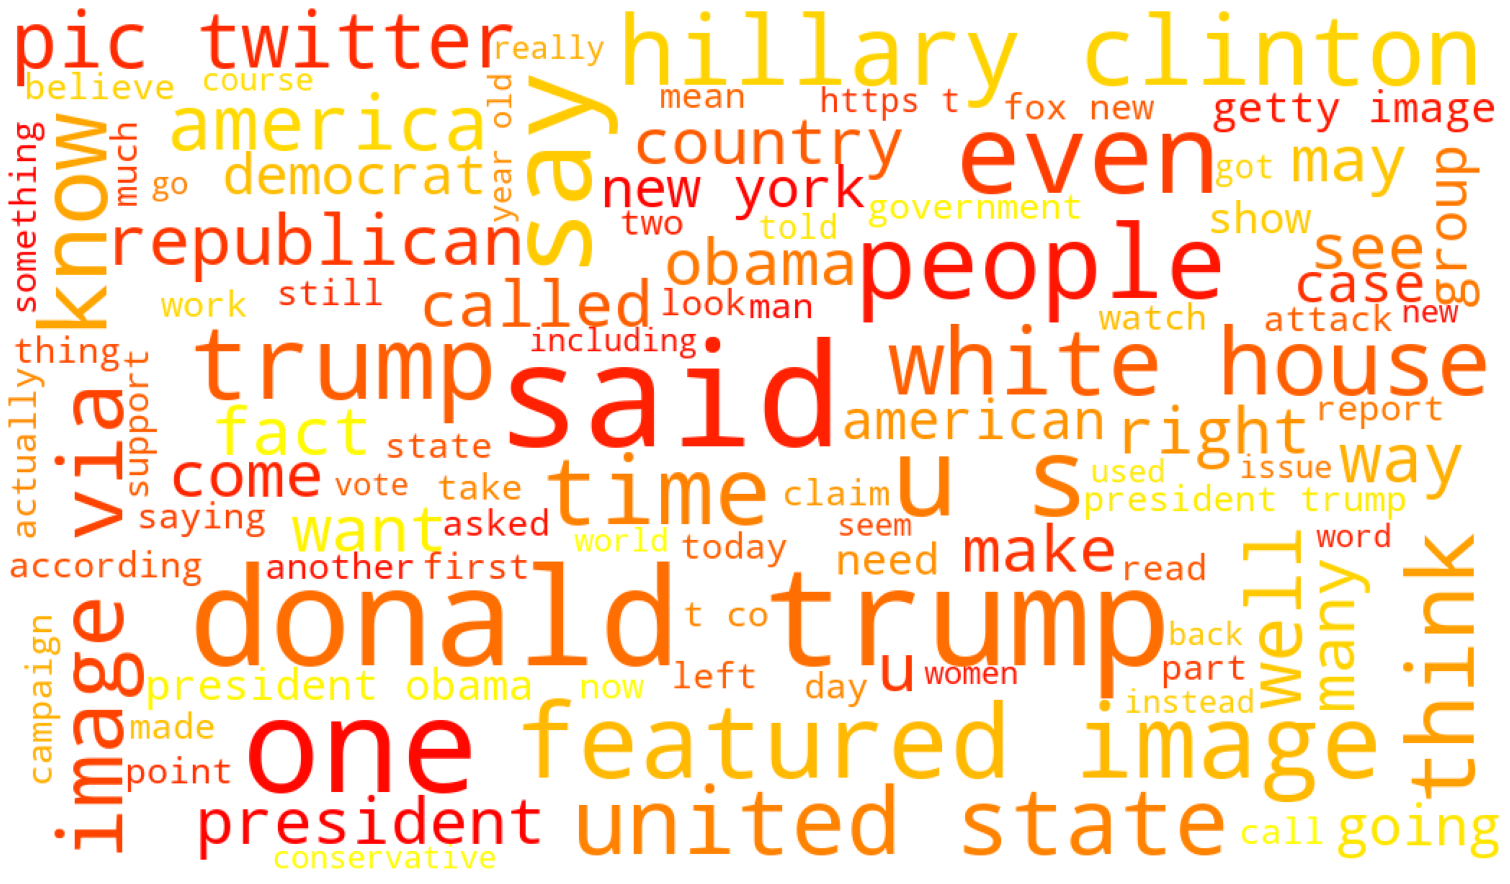

In [68]:
unique_string=(" ").join(fake_text_list)
wordcloud = WordCloud(max_font_size=100, max_words=100, colormap="autumn", background_color="white", mask=mask).generate(unique_string)
plt.figure(figsize=(30,16))
plt.imshow(wordcloud)
plt.axis("off")
#plt.title('Cuerpo de Noticias Falsas', fontsize=40)
plt.savefig("fake_text_wordcloud"+".png")
plt.show()
plt.close()

In [ ]:
unique_string=(" ").join(fake_title_list)
wordcloud = WordCloud(max_font_size=100, max_words=100, colormap="autumn", background_color="white", mask=mask).generate(unique_string)
plt.figure(figsize=(30, 16))
plt.imshow(wordcloud)
plt.axis("off")
#plt.title('Títulos de Noticias Falsas', fontsize=40)
plt.savefig("fake_title_wordcloud"+".png")
plt.show()
plt.close()

In [ ]:
unique_string=(" ").join(true_text_list)
wordcloud = WordCloud(max_font_size=100, max_words=100, colormap="winter", background_color="white", mask=mask).generate(unique_string)
plt.figure(figsize=(30, 16))
plt.imshow(wordcloud)
plt.axis("off")
#plt.title('Cuerpo de Noticias Reales', fontsize=40)
plt.savefig("true_text_wordcloud"+".png")
plt.show()
plt.close()

In [ ]:
unique_string=(" ").join(true_title_list)
wordcloud = WordCloud(max_font_size=100, max_words=100, colormap="winter", background_color="white", mask=mask).generate(unique_string)
plt.figure(figsize=(30, 16))
plt.imshow(wordcloud)
plt.axis("off")
#plt.title('Título de Noticias Reales', fontsize=40)
plt.savefig("true_title_wordcloud"+".png")
plt.show()
plt.close()